## Data Extraction Automation using API:

### Importing libraries:

In [1]:
from requests import request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import csv
import os
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt


### Data Extraction:

In [3]:
# create api_runner function
def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY':'ad24ace8-5865-4e4f-83e7-46d6fde3a7ff',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    
    
    # normalize the data and make it pretty in a dataframe:
      df2 = pd.json_normalize(data['data'])
      df2['timestamp'] = pd.to_datetime('now')
    
      #df_append = pd.DataFrame(df2)
     # df = pd.concat([df,df_append])
      df = pd.concat([df2, df], ignore_index=True)
      
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    


In [4]:
# make the program sleep for 1 minute and then run again automatically
# Initialize global df
df = pd.DataFrame()

for i in range(333):
    api_runner()
    print('API Runner completed!')
    sleep(60) 
exit()
    

API Runner completed!


KeyboardInterrupt: 

In [5]:
# to change the default display format for floating-point numbers in the  DataFrame:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [6]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12228,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19882940.00000,19882940.00000,False,NaN,1,NaN,NaN,None,2025-06-24T17:59:00.000Z,106089.73094,61169589066.13422,5.78730,0.01726,3.53035,2.14813,-1.20023,12.17313,22.57609,2109375754837.82178,64.39080,2227884349678.37988,None,2025-06-24T17:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-24 13:00:25.470834
1,1027,Ethereum,ETH,ethereum,10357,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120719276.78828,120719276.78828,True,NaN,2,NaN,NaN,None,2025-06-24T17:58:00.000Z,2460.40248,26564939012.44892,15.96690,-0.33318,8.13977,-0.37286,-2.14040,37.76252,22.59471,297018008425.80341,9.06390,297018008425.79999,None,2025-06-24T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-24 13:00:25.470834
2,825,Tether USDt,USDT,tether,133766,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,156342070025.30093,159826220711.05719,True,NaN,3,NaN,NaN,None,2025-06-24T17:58:00.000Z,1.00038,97448165825.97815,12.81340,-0.01091,-0.02676,0.01739,0.00490,-0.00038,0.02407,156401285160.68140,4.77300,159886755481.35001,None,2025-06-24T17:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-24 13:00:25.470834
3,52,XRP,XRP,xrp,1632,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58938652386.00000,99986013292.00000,False,NaN,4,NaN,NaN,None,2025-06-24T17:58:00.000Z,2.19748,4671364231.43233,14.87550,-0.23889,8.42652,2.03766,-4.36446,0.47711,-8.03651,129516542109.07005,3.95260,219748054741.47000,None,2025-06-24T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-24 13:00:25.470834
4,1839,BNB,BNB,bnb,2592,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140885772.67000,140885772.67000,False,NaN,5,NaN,NaN,None,2025-06-24T17:58:00.000Z,643.31706,1637266378.82531,-6.36560,0.02821,2.54708,0.05950,-3.29617,6.70646,3.65479,90634220697.31158,2.76670,90634220697.31000,None,2025-06-24T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-24 13:00:25.470834
5,5426,Solana,SOL,solana,940,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,531207860.22554,603724974.25643,True,NaN,6,525236893.30000,76049078111.11931,None,2025-06-24T17:59:00.000Z,144.79005,5233275205.60180,10.61350,-0.71660,5.85500,-1.12959,-15.31582,-4.01620,4.85616,76913614734.33038,2.34790,87413371586.28999,None,2025-06-24T17:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-24 13:00:25.470834
6,3408,USDC,USDC,usd-coin,28856,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61810247344.44999,61810247344.44999,False,NaN,7,60901219650.23000,60894853911.65955,None,2025-06-24T17:58:00.000Z,0.99990,14954817807.81496,22.37120,-0.00379,-0.01815,-0.00367,0.00935,0.01474,-0.01112,61803786589.18384,1.88610,61803786589.18000,None,2025-06-24T17:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-24 13:00:25.470834
7,1958,TRON,TRX,tron,1190,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94811547468.96626,94811560207.94800,True,NaN,8,71659659264.00000,19646915664.08393,None,2025-06-24T17:59:00.000Z,0.27417,585939950.02787,-37.43500,0.18205,0.82241,0.11428,1.08229,12.78076,19.43903,25994464615.

In [ ]:
### ### Visualizing the average of change for each cryptocurrency:

In [7]:

# group the data by name of cryptocurrency

df_grouped = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df_grouped

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.01726,3.53035,2.14813,-1.20023,12.17313,22.57609
Ethereum,-0.33318,8.13977,-0.37286,-2.14040,37.76252,22.59471
Tether USDt,-0.01091,-0.02676,0.01739,0.00490,-0.00038,0.02407
XRP,-0.23889,8.42652,2.03766,-4.36446,0.47711,-8.03651
BNB,0.02821,2.54708,0.05950,-3.29617,6.70646,3.65479
Solana,-0.71660,5.85500,-1.12959,-15.31582,-4.01620,4.85616
USDC,-0.00379,-0.01815,-0.00367,0.00935,0.01474,-0.01112
TRON,0.18205,0.82241,0.11428,1.08229,12.78076,19.43903
Dogecoin,-0.53917,6.20856,-1.14953,-24.77024,-8.98968,-15.36142


In [8]:
type(df_grouped)

pandas.core.frame.DataFrame

In [11]:
# aggregation of the DF group by object:
df_aggregated = df_grouped.stack()
df_aggregated

name                                      
Bitcoin       quote.USD.percent_change_1h      0.01726
              quote.USD.percent_change_24h     3.53035
              quote.USD.percent_change_7d      2.14813
              quote.USD.percent_change_30d    -1.20023
              quote.USD.percent_change_60d    12.17313
              quote.USD.percent_change_90d    22.57609
Ethereum      quote.USD.percent_change_1h     -0.33318
              quote.USD.percent_change_24h     8.13977
              quote.USD.percent_change_7d     -0.37286
              quote.USD.percent_change_30d    -2.14040
              quote.USD.percent_change_60d    37.76252
              quote.USD.percent_change_90d    22.59471
Tether USDt   quote.USD.percent_change_1h     -0.01091
              quote.USD.percent_change_24h    -0.02676
              quote.USD.percent_change_7d      0.01739
              quote.USD.percent_change_30d     0.00490
              quote.USD.percent_change_60d    -0.00038
              quote.US

In [12]:
df3 = df_aggregated.to_frame(name='values')
df3

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.01726
             quote.USD.percent_change_24h   3.53035
             quote.USD.percent_change_7d    2.14813
             quote.USD.percent_change_30d  -1.20023
             quote.USD.percent_change_60d  12.17313
             quote.USD.percent_change_90d  22.57609
Ethereum     quote.USD.percent_change_1h   -0.33318
             quote.USD.percent_change_24h   8.13977
             quote.USD.percent_change_7d   -0.37286
             quote.USD.percent_change_30d  -2.14040
             quote.USD.percent_change_60d  37.76252
             quote.USD.percent_change_90d  22.59471
Tether USDt  quote.USD.percent_change_1h   -0.01091
             quote.USD.percent_change_24h  -0.02676
             quote.USD.percent_change_7d    0.01739
             quote.USD.percent_change_30d   0.00490
             quote.USD.percent_change_60d  -0.00038
             quote.USD.percent_change_90d   0.02407
XRP          quote.USD.percent_change_1h   -0.23889
             quote.USD.percent_change_24h   8.42652
             quote.USD.percent_change_7d    2.03766
             quote.USD.percent_change_30d  -4.36446
             quote.USD.percent_change_60d   0.47711
             quote.USD.percent_change_90d  -8.03651
BNB          quote.USD.percent_change_1h    0.02821
             quote.USD.percent_change_24h   2.54708
             quote.USD.percent_change_7d    0.05950
             quote.USD.percent_change_30d  -3.29617
             quote.USD.percent_change_60d   6.70646
             quote.USD.percent_change_90d   3.65479
Solana       quote.USD.percent_change_1h   -0.71660
             quote.USD.percent_change_24h   5.85500
             quote.USD.percent_change_7d   -1.12959
             quote.USD.percent_change_30d -15.31582
             quote.USD.percent_change_60d  -4.01620
             quote.USD.percent_change_90d   4.85616
USDC         quote.USD.percent_change_1h   -0.00379
             quote.USD.percent_change_24h  -0.01815
             quote.USD.percent_change_7d   -0.00367
             quote.USD.percent_change_30d   0.00935
             quote.USD.percent_change_60d   0.01474
             quote.USD.percent_change_90d  -0.01112
TRON         quote.USD.percent_change_1h    0.18205
             quote.USD.percent_change_24h   0.82241
             quote.USD.percent_change_7d    0.11428
             quote.USD.percent_change_30d   1.08229
             quote.USD.percent_change_60d  12.78076
             quote.USD.percent_change_90d  19.43903
Dogecoin     quote.USD.percent_change_1h   -0.53917
             quote.USD.percent_change_24h   6.20856
             quote.USD.percent_change_7d   -1.14953
             quote.USD.percent_change_30d -24.77024
             quote.USD.percent_change_60d  -8.98968
             quote.USD.percent_change_90d -15.36142
Cardano      quote.USD.percent_change_1h   -0.53643
             quote.USD.percent_change_24h   7.02480
             quote.USD.percent_change_7d   -3.03574
             quote.USD.percent_change_30d -21.07359
             quote.USD.percent_change_60d -18.09121
             quote.USD.percent_change_90d -19.71930
Hyperliquid  quote.USD.percent_change_1h   -1.52510
             quote.USD.percent_change_24h   6.37750
             quote.USD.percent_change_7d   -2.50948
             quote.USD.percent_change_30d   0.74436
             quote.USD.percent_change_60d 107.90040
             quote.USD.percent_change_90d 168.63472
Sui          quote.USD.percent_change_1h   -0.66081
             quote.USD.percent_change_24h  10.14401
             quote.USD.percent_change_7d   -1.22627
             quote.USD.percent_change_30d -20.51790
             quote.USD.percent_change_60d -21.76759
             quote.USD.percent_change_90d   8.63031
Chainlink    quote.USD.percent_change_1h   -0.95750
             quote.USD.percent_change_24h  13.90674
             quote.USD.percent_change_7d    4.93136
             quote.USD.percent_change_30d

In [13]:
df3 = df3.reset_index()
df3.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.01726
1,Bitcoin,quote.USD.percent_change_24h,3.53035
2,Bitcoin,quote.USD.percent_change_7d,2.14813
3,Bitcoin,quote.USD.percent_change_30d,-1.20023
4,Bitcoin,quote.USD.percent_change_60d,12.17313


In [14]:
type(df3)

pandas.core.frame.DataFrame

In [15]:
# rename the column level_1:
df3 = df3.rename(columns={'level_1':'percentage_change'})
df3.head()

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.01726
1,Bitcoin,quote.USD.percent_change_24h,3.53035
2,Bitcoin,quote.USD.percent_change_7d,2.14813
3,Bitcoin,quote.USD.percent_change_30d,-1.20023
4,Bitcoin,quote.USD.percent_change_60d,12.17313


In [16]:
df3['percentage_change']=df3['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])

In [17]:
df3

,name,percentage_change,values
0,Bitcoin,1h,0.01726
1,Bitcoin,24h,3.53035
2,Bitcoin,7d,2.14813
3,Bitcoin,30d,-1.20023
4,Bitcoin,60d,12.17313
5,Bitcoin,90d,22.57609
6,Ethereum,1h,-0.33318
7,Ethereum,24h,8.13977
8,Ethereum,7d,-0.37286
9,Ethereum,30d,-2.14040


C:\Users\sanas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


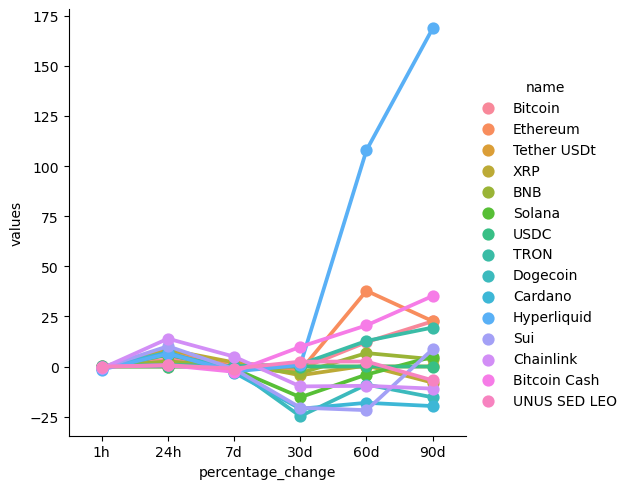

In [18]:
# Point Plot: The plot will show points for each combination of percentage change and values,
#connected by lines within each name category to show trends.
sns.catplot(x='percentage_change', y='values', hue='name', data=df3, kind='point')
# the 'hue' parameter is useful because we have multiple groups (name groups) and we want to compare trends over time

